# Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Model
from keras.models import Sequential
from keras.layers import Dense

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

# Load Data

In [ ]:
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
test_images.shape

(10000, 28, 28)

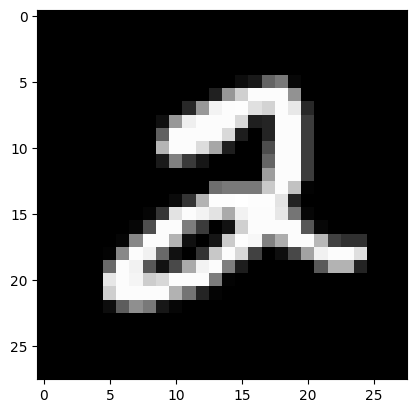

In [ ]:
plt.imshow(train_images[5], cmap='gray')

In [ ]:
train_labels[5]

2

# Train Test Split

In [ ]:
train_images = train_images.reshape(60000, 784)
test_images = test_images.reshape(10000, 784)

In [ ]:
train_images.shape

(60000, 784)

In [ ]:
test_images.shape

(10000, 784)

In [ ]:
train_images = train_images.astype('float32')/255.0
test_images = test_images.astype('float32')/255.0

In [ ]:
#train_images[1]

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

In [ ]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Design the Model

In [ ]:
#### Old ####
# model = Sequential()
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(10, activation='softmax'))

In [ ]:
def build_regularized_model(l2_factor=0.01, dropout_rate=0.3):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(784,), kernel_regularizer=l2(l2_factor)),
        Dropout(dropout_rate),
        Dense(256, activation='relu', kernel_regularizer=l2(l2_factor)),
        Dropout(dropout_rate),
        Dense(128, activation='relu', kernel_regularizer=l2(l2_factor)),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Create the model with specific regularization parameters
model = build_regularized_model(l2_factor=0.01, dropout_rate=0.3)
model.summary()

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 300938 (1.15 MB)
Trainable params: 300938 

In [ ]:
# Train the model with early stopping
history = model.fit(train_images, train_labels, epochs=20, batch_size=32,
                    validation_data=(test_images, test_labels), callbacks=[early_stopping])

Epoch 1/20
1875/1875 [==============================] - 14s 7ms/step - loss: 1.2141 - accuracy: 0.8660 - val_loss: 0.6685 - val_accuracy: 0.9216
Epoch 2/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.7246 - accuracy: 0.8979 - val_loss: 0.6167 - val_accuracy: 0.9301
Epoch 3/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6762 - accuracy: 0.9050 - val_loss: 0.5807 - val_accuracy: 0.9305
Epoch 4/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6473 - accuracy: 0.9088 - val_loss: 0.5572 - val_accuracy: 0.9322
Epoch 5/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6304 - accuracy: 0.9102 - val_loss: 0.6810 - val_accuracy: 0.8842
Epoch 6/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6226 - accuracy: 0.9105 - val_loss: 0.5340 - val_accuracy: 0.9369
Epoch 7/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6110 - accuracy: 0.9111 - val_loss: 0.5403 - val_ac

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 300938 (1.15 MB)
Trainable params: 300938 

#Evaluate

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)


313/313 [==============================] - 1s 2ms/step - loss: 0.4723 - accuracy: 0.9436


In [ ]:
test_loss

0.4723367691040039

In [ ]:
test_acc

0.9435999989509583

# Predict

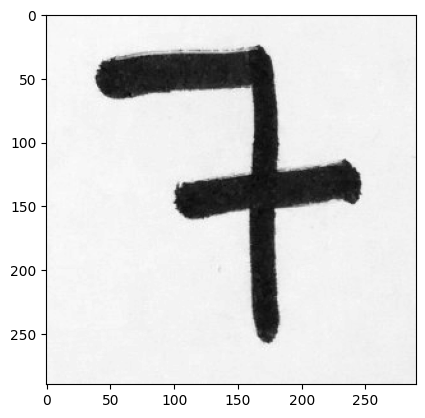

In [ ]:
import cv2
test_img = cv2.imread('/content/drive/MyDrive/CV_HW Solving/seven.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(test_img, cmap='gray')

In [ ]:
test_img_resized =  cv2.resize(test_img, (28, 28))
test_img_flatten = test_img_resized.reshape(1, 784)
test_img_normalized = test_img_flatten.astype('float32')/255.

In [ ]:
pred = model.predict(test_img_normalized)
pred

1/1 [==============================] - 0s 104ms/step


array([[0.20328748, 0.00097227, 0.02696492, 0.01234634, 0.00658297,
        0.06920876, 0.03814158, 0.00326274, 0.61430717, 0.02492585]],
      dtype=float32)

In [ ]:
prediced_label = np.argmax(pred)
prediced_label

8